<a href="https://colab.research.google.com/github/garthajon/QuantFinanceIntro/blob/main/stockcorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36056 sha256=113199e82c8e20feebc349482c5ab9f23908248d908631fb7adc5477f82c0e75
  Stored in directory: /root/.cache/pip/wheels/94/a7/d4/0e4e94292f5761407472684b2cd74771e9985af72f968101e0
Successfully built nsepy


In [2]:
#from https://tradewithpython.com/portfolio-analysis-using-python
#conda install nsepy
#pip install nsepy
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
#from datetime import datetime
from nsepy import get_history as gh

In [11]:
stocksymbols = [
'PLTR','NVDA','AAPL','TSLA','ACN','HBAN','RF']

startdate = date.today().replace(year=date.today().year - 1)
end_date = date.today()
print(startdate)
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2024-02-05
2025-02-05
You have 7 assets in your porfolio


In [ ]:
##df = pd.DataFrame()
##for i in range(len(stocksymbols)):
##   # data = yf.download(stocksymbols[i],'2023-03-22','2024-03-22')
##    data = yf.download(stocksymbols[i],startdate,end_date)
##    data['date'] = data.index
##    #convert data frame to pandas dataframe
##    data = pd.DataFrame(data, columns = ['date','Adj Close'])
##   data.rename(columns={'Adj Close':stocksymbols[i]},inplace=True)
##    data['date'] = pd.to_datetime(data['date'])
##    data = data.reset_index(drop= True)
##    data = data[['date',stocksymbols[i]]].set_index(['date'])
##   data = data.sort_index(ascending=[True])
##    #data.drop(['Symbol'], axis=1,inplace=True)
##    if i == 0:
##        df = data
##    if i != 0:
##        #left join using pandas merge
##        df = df.merge(data, on='date', how='left')
##df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:

# Initialize an empty dictionary to store dataframes
stock_data = {}
# Download data for each stock
for stock in stocksymbols:
    data = yf.download(stock, period='1y', progress=False)[['Close']]
    #data.rename(columns={'Adj Close': stock}, inplace=True)
    stock_data[stock] = data

# Merge data into a single DataFrame
df = pd.DataFrame()
for stock in stocksymbols:
    if df.empty:
        df = stock_data[stock]
    else:
        df = df.merge(stock_data[stock], on='Date', how='left')

# Reset index to have 'Date' as a column
#df.reset_index(inplace=True)
print(df.head())

Price           Close                                                 \
Ticker           PLTR       NVDA        AAPL        TSLA         ACN   
Date                                                                   
2024-02-05  16.719999  69.312355  186.765030  181.059998  365.811768   
2024-02-06  21.870001  68.203667  188.377136  185.100006  360.240723   
2024-02-07  23.600000  70.079124  188.486618  187.580002  362.166901   
2024-02-08  24.510000  69.621254  187.401917  189.559998  363.974518   
2024-02-09  24.379999  72.112564  188.169128  193.570007  367.125519   

Price                             
Ticker           HBAN         RF  
Date                              
2024-02-05  11.861663  17.162260  
2024-02-06  11.832967  17.066702  
2024-02-07  11.813834  17.047592  
2024-02-08  11.785137  17.095369  
2024-02-09  11.871230  17.200485  


<ipython-input-13-3547f697b8e5>:3: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(df[i], label = i)


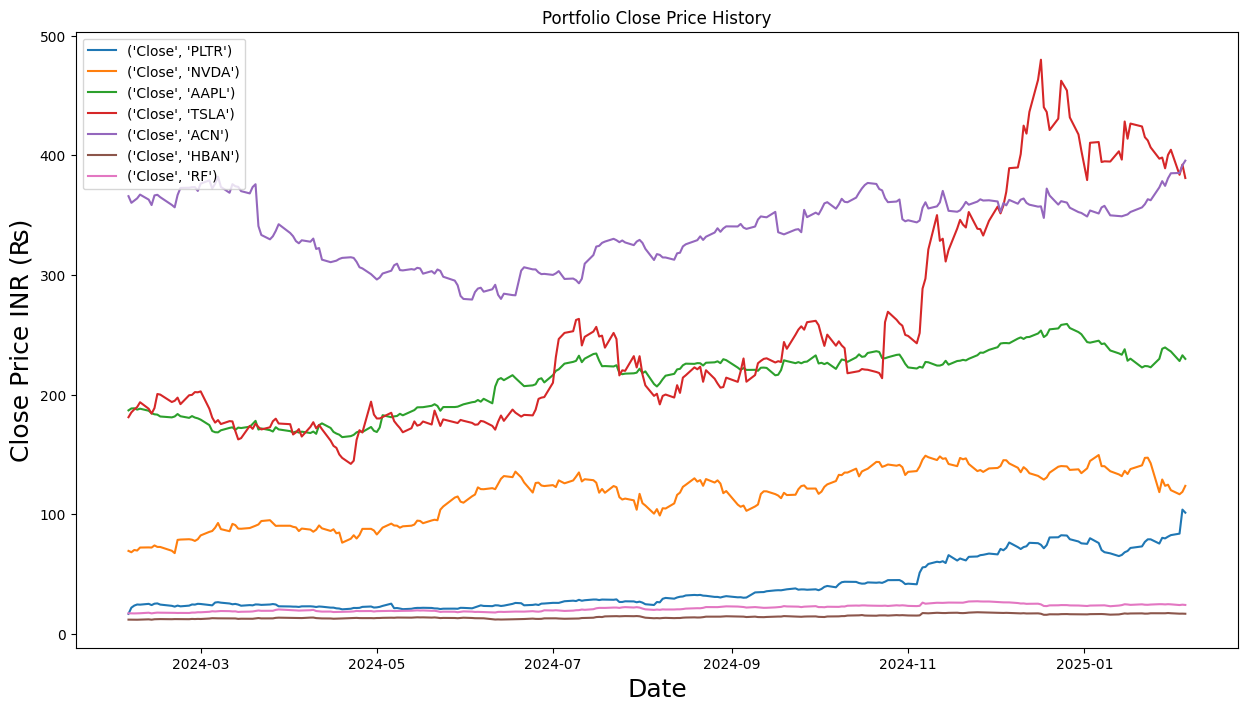

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

In [14]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

Price          Close                                                    \
Ticker          PLTR      NVDA      AAPL      TSLA       ACN      HBAN   
Date                                                                     
2024-02-06  0.308014 -0.015996  0.008632  0.022313 -0.015229 -0.002419   
2024-02-07  0.079104  0.027498  0.000581  0.013398  0.005347 -0.001617   
2024-02-08  0.038559 -0.006534 -0.005755  0.010555  0.004991 -0.002429   
2024-02-09 -0.005304  0.035784  0.004094  0.021154  0.008657  0.007305   
2024-02-12  0.027482  0.001594 -0.009002 -0.028104 -0.011408  0.020145   
...              ...       ...       ...       ...       ...       ...   
2025-01-30  0.018305  0.007680 -0.007395  0.028733  0.016906  0.012813   
2025-01-31  0.015637 -0.036743 -0.006692  0.010792  0.011031 -0.010926   
2025-02-03  0.015153 -0.028400 -0.033856 -0.051705  0.000675 -0.020930   
2025-02-04  0.239909  0.017058  0.021008  0.022232  0.016640  0.001782   
2025-02-05 -0.024848  0.042310 -0.012801 -0.028607  0.009908 -0.005631   

Price                 
Ticker            RF  
Date                  
2024-02-06 -0.005568  
2024-02-07 -0.001120  
2024-02-08  0.002803  
2024-02-09  0.006149  
2024-02-12  0.025556  
...              ...  
2025-01-30  0.007730  
2025-01-31 -0.005248  
2025-02-03 -0.023945  
2025-02-04  0.012890  
2025-02-05 -0.009236  

[251 rows x 7 columns]

In [15]:
correlation_matrix2 = daily_simple_return.corr(method='pearson')
correlation_matrix2

Price            Close                                                    \
Ticker            PLTR      NVDA      AAPL      TSLA       ACN      HBAN   
Price Ticker                                                               
Close PLTR    1.000000  0.283836  0.219826  0.300435  0.091224  0.214079   
      NVDA    0.283836  1.000000  0.214523  0.239188  0.128175  0.047769   
      AAPL    0.219826  0.214523  1.000000  0.354892  0.149410  0.106760   
      TSLA    0.300435  0.239188  0.354892  1.000000  0.048108  0.275255   
      ACN     0.091224  0.128175  0.149410  0.048108  1.000000  0.169698   
      HBAN    0.214079  0.047769  0.106760  0.275255  0.169698  1.000000   
      RF      0.219648  0.029134  0.134967  0.292581  0.146556  0.878167   

Price                   
Ticker              RF  
Price Ticker            
Close PLTR    0.219648  
      NVDA    0.029134  
      AAPL    0.134967  
      TSLA    0.292581  
      ACN     0.146556  
      HBAN    0.878167  
      RF      1.000000

Correlation between Stocks in your portfolio


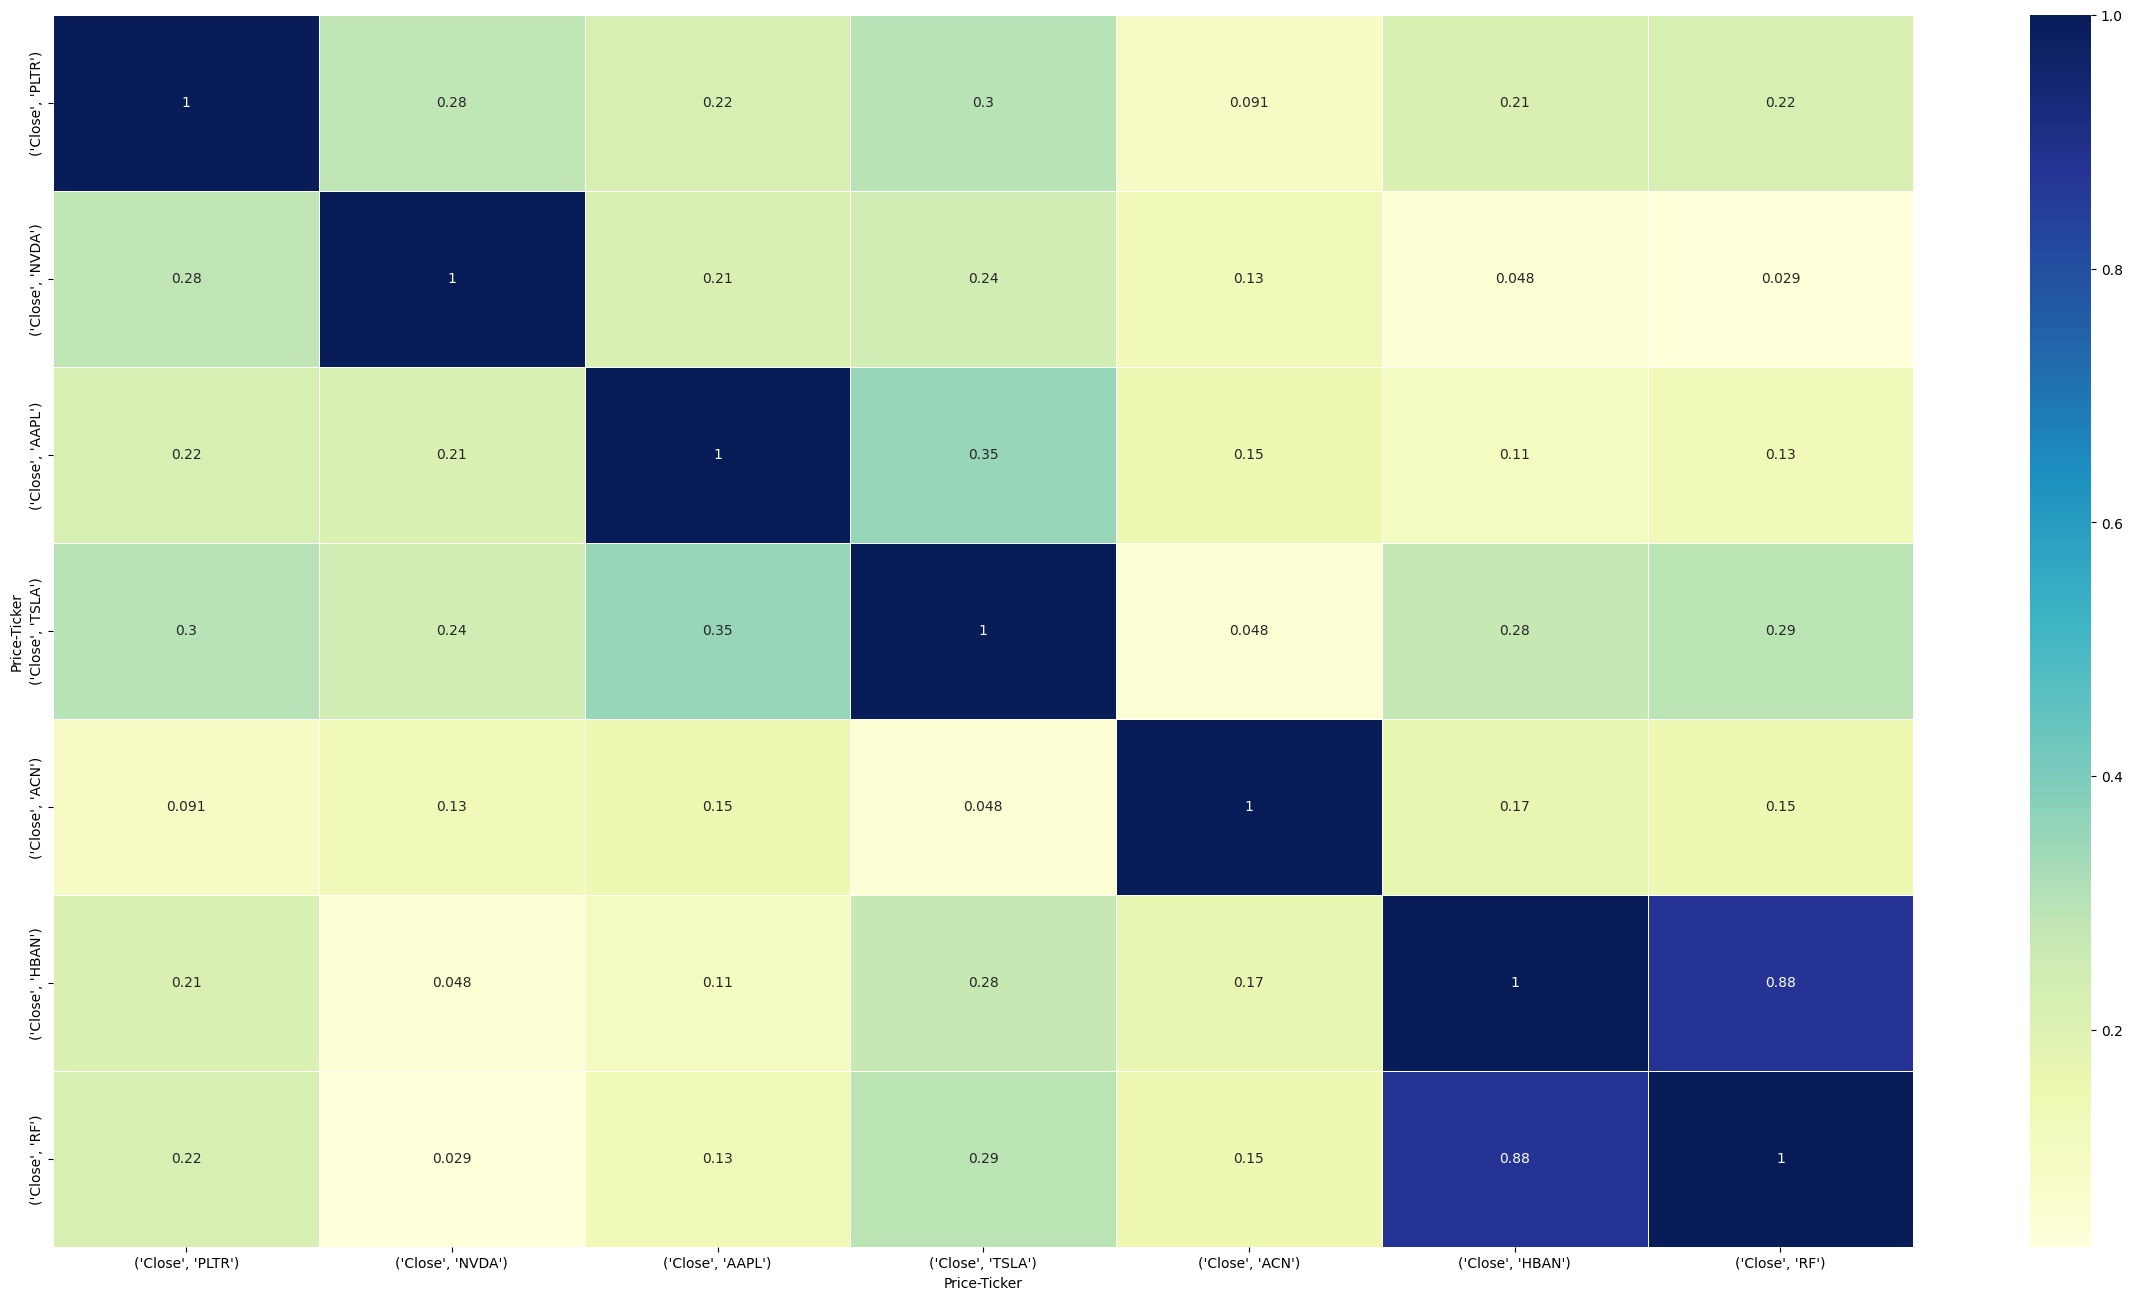

In [16]:
fig2 = plt.figure(figsize=(30,16))
sb.heatmap(correlation_matrix2,xticklabels=correlation_matrix2.columns, yticklabels=correlation_matrix2.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig2)

Daily simple returns


<ipython-input-17-a30a2b967f4d>:6: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(daily_simple_return[i], lw =2 ,label = i)


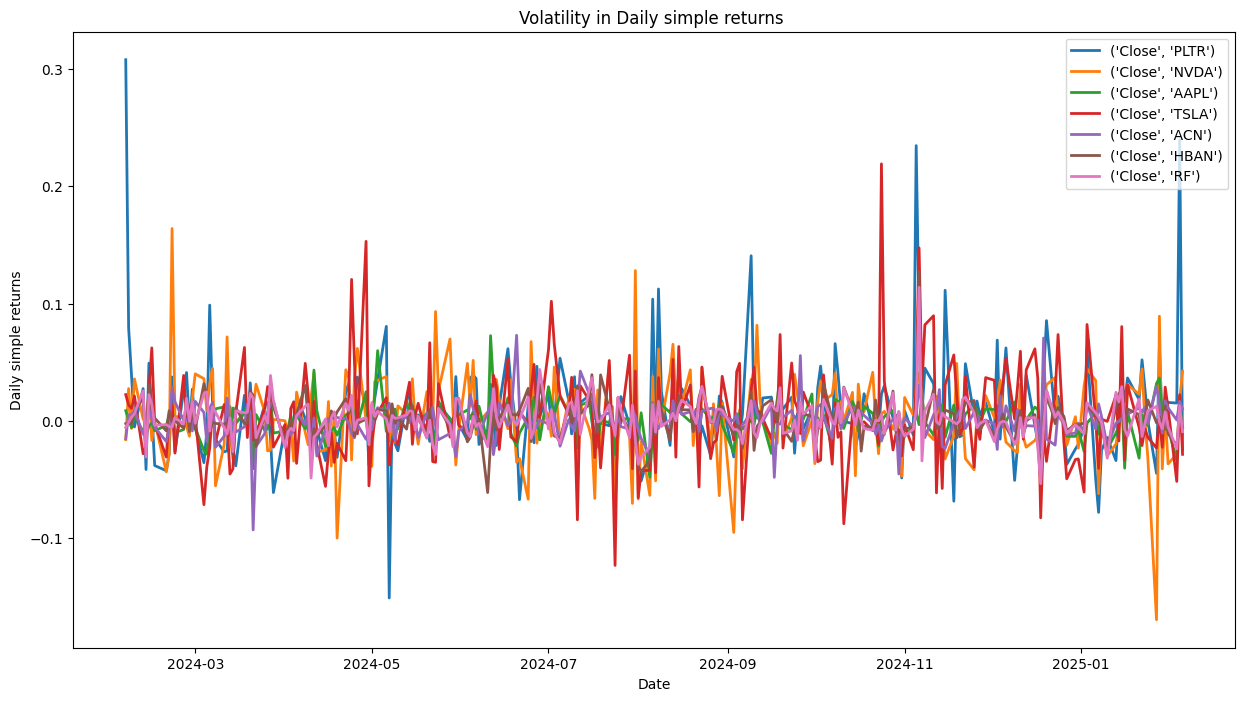

In [17]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

<Axes: title={'center': 'Risk Box Plot'}>

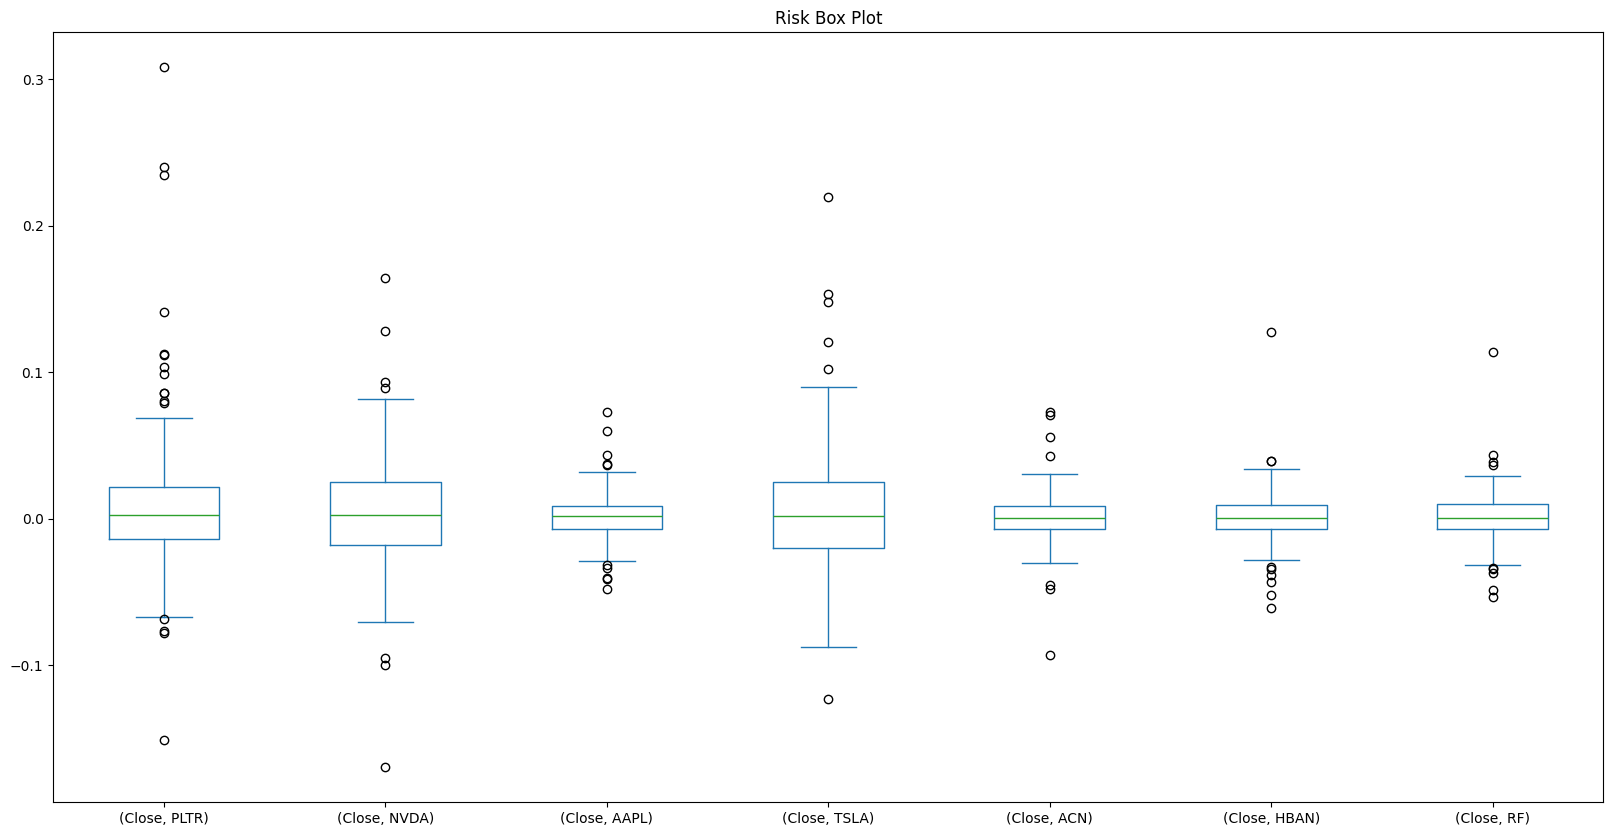

In [18]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")

In [19]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)
print('stdev Daily returns(%) of stocks in your portfolio')
stdev_daily = daily_simple_return.std()
print(stdev_daily*100)

Average Daily returns(%) of stocks in your portfolio
Price  Ticker
Close  PLTR      0.808658
       NVDA      0.294579
       AAPL      0.093660
       TSLA      0.375362
       ACN       0.043340
       HBAN      0.152191
       RF        0.149006
dtype: float64
stdev Daily returns(%) of stocks in your portfolio
Price  Ticker
Close  PLTR      4.362106
       NVDA      3.571321
       AAPL      1.487500
       TSLA      4.020381
       ACN       1.566114
       HBAN      1.689994
       RF        1.629656
dtype: float64


In [20]:
print('Return per unit of risk aka sharpes ratio - the higher the ratio the more return against risk')
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

Return per unit of risk aka sharpes ratio - the higher the ratio the more return against risk


Price  Ticker
Close  PLTR      1.167799
       NVDA      0.519604
       AAPL      0.396641
       TSLA      0.588143
       ACN       0.174326
       HBAN      0.567288
       RF        0.575980
dtype: float64

Cummulative Returns


<ipython-input-21-ad0e2de6443d>:7: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)


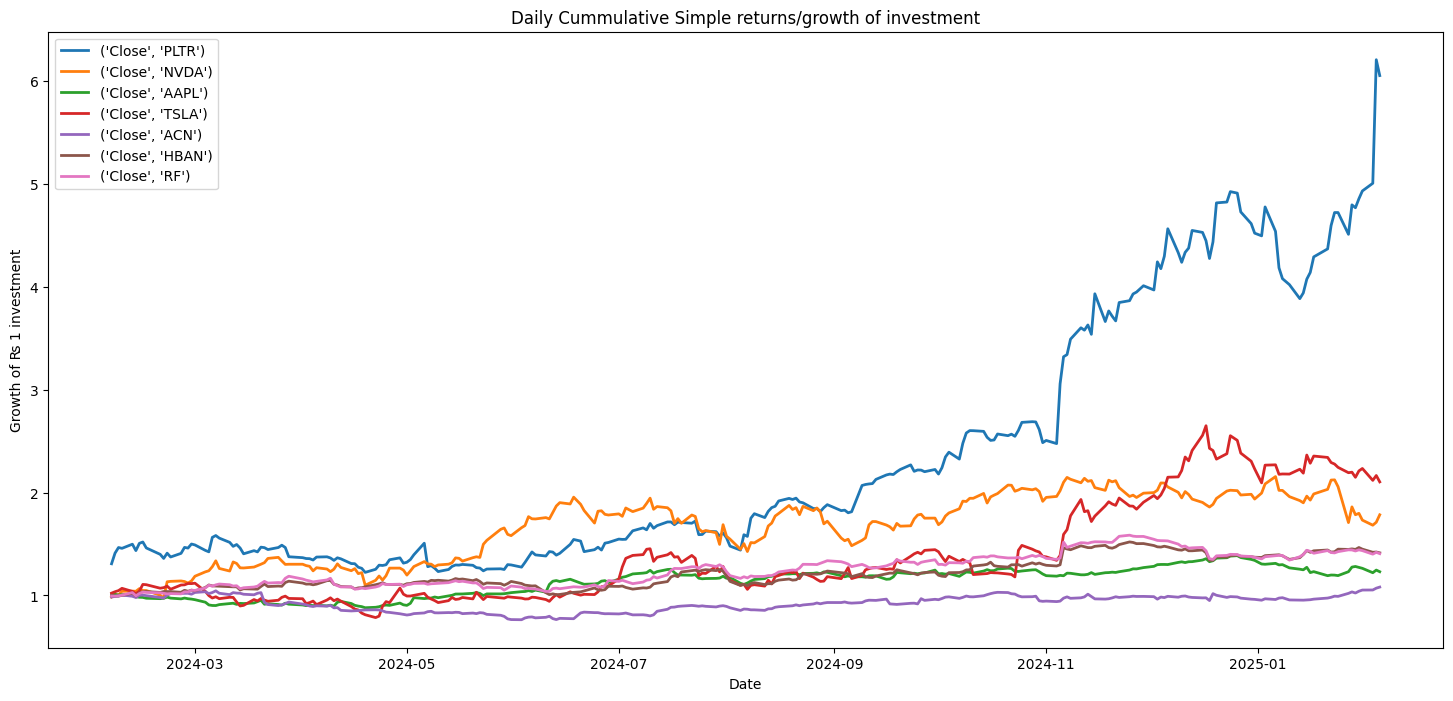

In [21]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)

In [22]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)

Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
Price  Ticker
Close  PLTR      69.246289
       NVDA      56.692960
       AAPL      23.613331
       TSLA      63.821573
       ACN       24.861292
       HBAN      26.827827
       RF        25.869990
dtype: float64
